In [187]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
nltk.download('wordnet')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\second\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\second\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import des données

In [188]:
filename = "./sentiment_labelled_sentences/imdb_labelled.txt"

df = pd.read_csv(filename, sep="\t")
df.columns = ["sentence", "label"]

print("shape", df.shape)

shape (747, 2)


In [189]:
df.head()


sentence  label
0  Not sure who was more lost - the flat characte...      0
1  Attempting artiness with black & white and cle...      0
2       Very little music or anything to speak of.        0
3  The best scene in the movie was when Gerardo i...      1
4  The rest of the movie lacks art, charm, meanin...      0

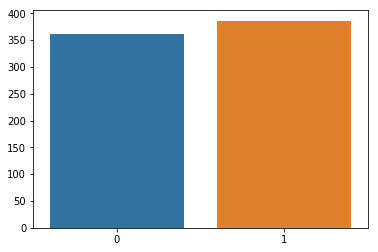

In [190]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

## Bag of words 

### Sur un sous-jeu de données

In [191]:
X_sub = df['sentence'][0:10]


On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [192]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'adorable', 'almost', 'and', 'angles', 'anything', 'art', 'artiness', 'as', 'attempting', 'audience', 'baby', 'became', 'because', 'best', 'bit', 'black', 'buffet', 'camera', 'casting', 'characters', 'charm', 'clever', 'disappointed', 'effort', 'emptiness', 'empty', 'even', 'existent', 'find', 'flat', 'for', 'gerardo', 'good', 'guess', 'half', 'head', 'his', 'hours', 'if', 'in', 'is', 'it', 'jimmy', 'keeps', 'kids', 'lacks', 'lines', 'little', 'lost', 'loved', 'meaning', 'messages', 'more', 'movie', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'owls', 'plot', 'poor', 'predictable', 'rest', 'ridiculous', 'running', 'saw', 'scene', 'science', 'song', 'speak', 'sure', 'teacher', 'that', 'the', 'those', 'thought', 'through', 'to', 'today', 'trying', 'two', 'very', 'walked', 'was', 'wasted', 'were', 'when', 'white', 'who', 'whom', 'with', 'works']


In [193]:
print(count_vect.vocabulary_.get(u'who'))

93


In [194]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(10, 97)
  (0, 62)	1
  (0, 87)	1
  (0, 94)	1
  (0, 60)	1
  (0, 36)	1
  (0, 57)	1
  (0, 11)	1
  (0, 61)	1
  (0, 21)	1
  (0, 31)	1
  (0, 78)	2
  (0, 50)	1
  (0, 54)	1
  (0, 88)	1
  (0, 93)	1
  (0, 75)	1
  (0, 59)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [195]:
print(X_sub_counts.toarray()[0,:])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [196]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [197]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

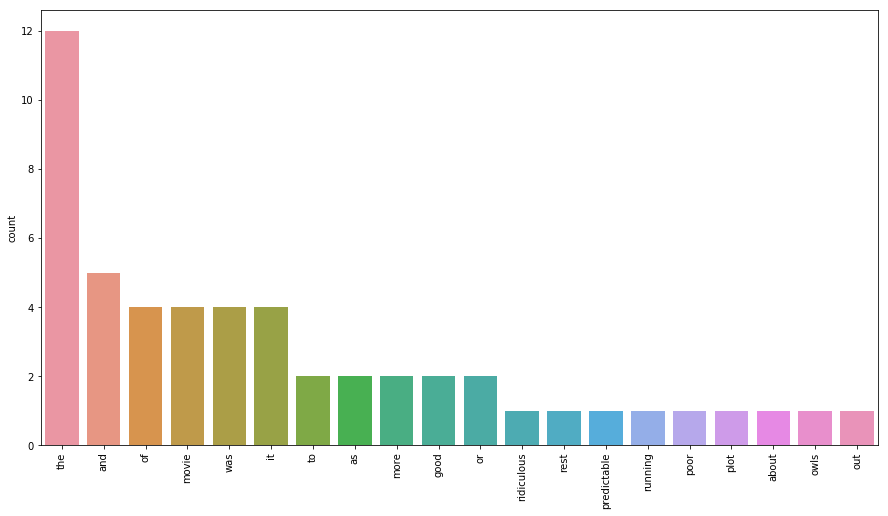

In [198]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On définit une fonction qui prend en encapsule ce qui précède

In [199]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [200]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  97


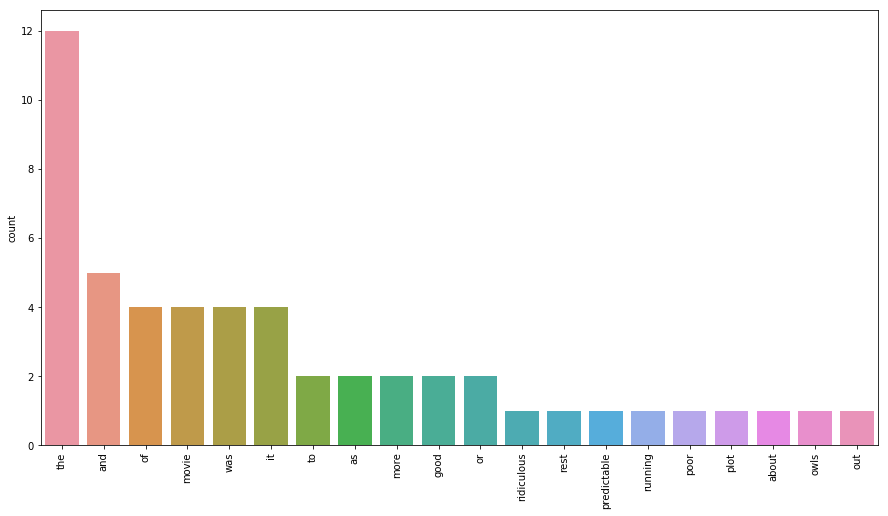

In [201]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)


### Passage aux données complètes

In [202]:
X = df['sentence']


Taille du dictionnaire :  3044


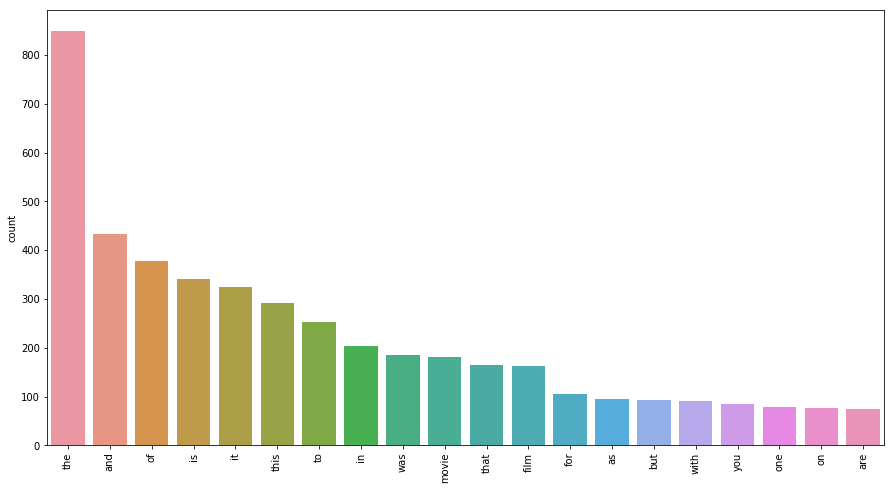

In [203]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

Quels problèmes voyez-vous ?

## Préparation des données

### Miniscules UTF-8 sans ponctuation

Toujours vérifier que les mots sont en minuscule, qu'il n'a pas de signe de ponctuation, etc

### Stopwords

In [204]:
stop = set(stopwords.words('english')) 
print(stop)

{'ain', 'up', 'we', 'you', 'me', 'these', 'and', 'my', "that'll", 'once', 'doesn', 'herself', 'most', 'isn', 'ourselves', 'yours', 'a', 'yourself', 'by', "couldn't", 'aren', 'had', 'some', 'mightn', "shan't", 'wasn', 'before', 'ma', 'did', 'its', 'them', 'of', 'each', 'very', 'down', 'such', 'again', 'only', 'his', 'myself', 'how', 'couldn', "wasn't", 'has', 'itself', 'why', 'about', 'should', 'ours', 'few', 'shouldn', 'won', 'theirs', 'themselves', 'when', "needn't", 'so', 'against', "won't", "you'd", 'wouldn', 'then', 'nor', 'been', 'after', 'into', 'off', 'until', 'needn', 'be', 'o', 'there', 'who', 'to', 'where', 'hasn', "don't", 'during', 'on', 'will', 'i', 'above', 'being', 'he', 'mustn', "wouldn't", 'shan', 'or', 'through', 'whom', 'for', 'their', 'here', 'which', 'if', "she's", 'no', 'own', 'yourselves', 'other', 'under', 'were', "you'll", "hasn't", 'was', 'hers', 'she', 'our', 'this', 're', "isn't", 'because', 'have', 'do', "mustn't", 'with', "aren't", 'that', 'hadn', 'while',

Taille du dictionnaire :  2913


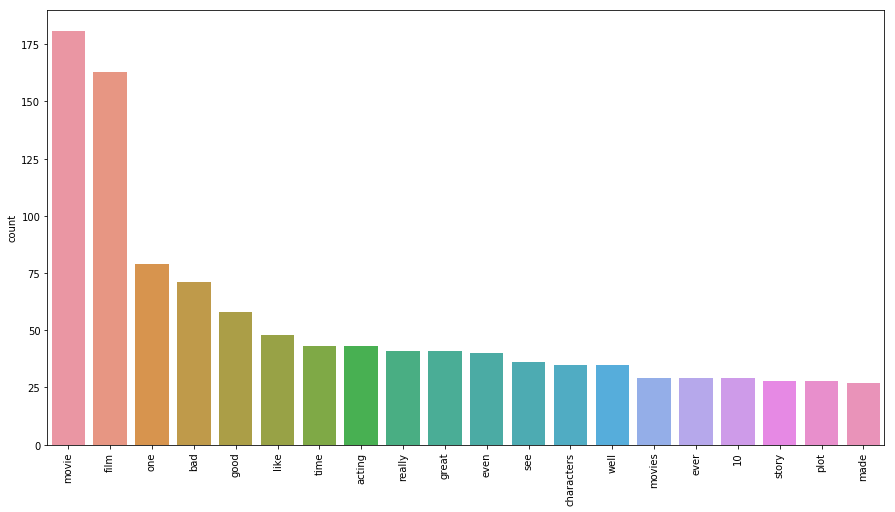

In [205]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

### Visualisation du corpus

In [206]:
most_frequent_words_sw['data_counts']

<747x2913 sparse matrix of type '<class 'numpy.int64'>'
	with 6876 stored elements in Compressed Sparse Row format>

In [207]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

In [208]:
hist[np.argsort(df['label']),:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

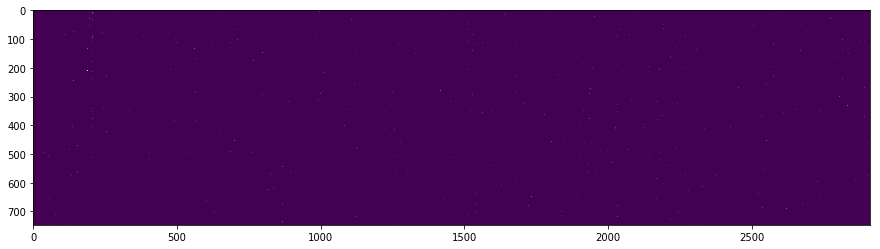

In [209]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(df['label']),:])
#plt.colorbar()

### Avec TF_IDF

In [210]:
transformer = TfidfTransformer(smooth_idf=False)
transformer


TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [211]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])


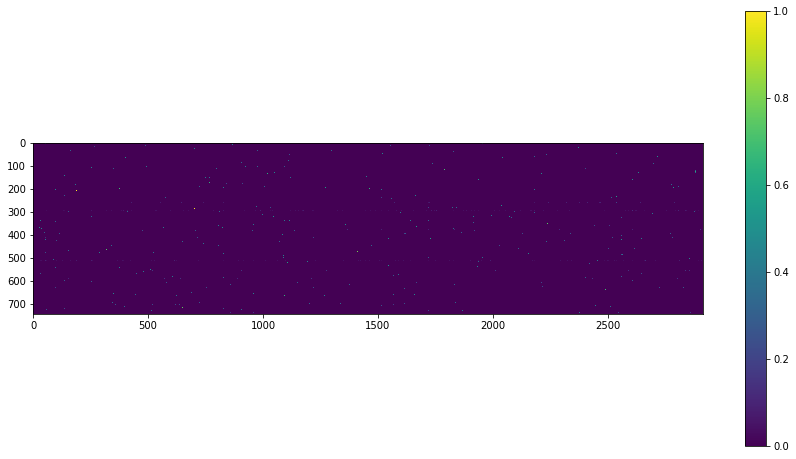

In [212]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(df['label']),:])
plt.colorbar()

## Apprentissage supervisé

### Sur les counts

In [213]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=df['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),df['label'])

0.9665327978580991

### Sur le TF-IDF

In [214]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),df['label'])

0.9665327978580991

In [215]:
df['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

In [216]:
df['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())

In [217]:
df[df['prediction_tfidf'] != df['label']]

sentence  label  \
23                             Give this one a look.        1   
38           I don't think you will be disappointed.        1   
58                 A great film by a great director.        1   
63                                             10/10        1   
163  Everything from acting to cinematography was s...      1   
250  I won't say any more - I don't like spoilers, ...      1   
293                 But this movie really got to me.        1   
294                                          See it.        1   
312                                The cast is good.        1   
332                              the cast was great.        1   
414                                     Go watch it!        1   
433                I'll give this film 10 out of 10!        1   
455              There still are good actors around!        1   
478                                   GO AND SEE IT!        1   
484                 A good film by a great director!        1   
487                      This is just a great movie.        1   
496                            Highly recommended A+        1   
541         I just saw this film and I recommend it.        1   
589                                            10/10        1   
595                Predictable, but not a bad watch.        1   
632                       See both films if you can.        1   
690                                      Go rent it.        1   
706                I have recommended it to friends.        1   
728                I keep watching it over and over.        1   
730  If you have not seen this movie, I definitely ...      1   

     prediction_counts  prediction_tfidf  
23                   1                 0  
38                   0                 0  
58                   1                 0  
63                   1                 0  
163                  1                 0  
250                  1                 0  
293                  1                 0  
294                  1                 0  
312                  1                 0  
332                  1                 0  
414                  1                 0  
433                  1                 0  
455                  1                 0  
478                  1                 0  
484                  1                 0  
487                  1                 0  
496                  1                 0  
541                  1                 0  
589                  1                 0  
595                  0                 0  
632                  1                 0  
690                  1                 0  
706                  1                 0  
728                  0                 0  
730                  1                 0

In [218]:
df[df['prediction_counts'] != df['label']]

sentence  label  \
20   If there was ever a movie that needed word-of-...      1   
38           I don't think you will be disappointed.        1   
49   The directing and the cinematography aren't qu...      0   
76   I saw "Mirrormask" last night and it was an un...      0   
123                            Highly unrecommended.        0   
131                   There were too many close ups.        0   
142                   It even has its sweet moments.        1   
175  If you see it, you should probably just leave ...      0   
235  1/10 - and only because there is no setting fo...      0   
244  The last 15 minutes of movie are also not bad ...      1   
335   but the movie makes a lot of serious mistakes.        0   
373                                 Not recommended.        0   
386                                 Not recommended.        0   
468                                  It is not good.        0   
471                        This is a stunning movie.        1   
518           You can find better movies at youtube.        0   
576                     You won't forget this movie!        1   
577                          Why was this film made?        0   
579  The result is a film that just don't look righ...      0   
595                Predictable, but not a bad watch.        1   
624  I struggle to find anything bad to say about i...      1   
651  I'm so sorry but I really can't recommend it t...      0   
658                        This is not movie-making.        0   
672                               Not easy to watch.        0   
728                I keep watching it over and over.        1   

     prediction_counts  prediction_tfidf  
20                   0                 1  
38                   0                 0  
49                   1                 0  
76                   1                 0  
123                  1                 0  
131                  1                 0  
142                  0                 1  
175                  1                 0  
235                  1                 0  
244                  0                 1  
335                  1                 0  
373                  1                 0  
386                  1                 0  
468                  1                 0  
471                  0                 1  
518                  1                 0  
576                  0                 1  
577                  1                 0  
579                  1                 0  
595                  0                 0  
624                  0                 1  
651                  1                 0  
658                  1                 0  
672                  1                 0  
728                  0                 0

In [219]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),df['label'])

0.9866131191432396

In [220]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  wonderful


### Avec une pipeline

In [221]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [222]:
text_clf.fit(X,df['label'])#
accuracy_score(text_clf.predict(X),df['label'])

0.9825970548862115

## Jeu de données complet

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [223]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

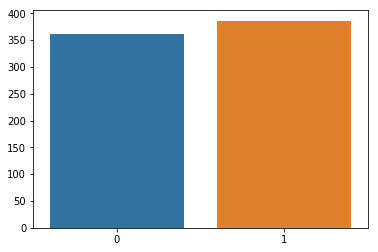

In [224]:
np.unique(y_train)
sns.barplot(np.unique(y_train),df.groupby('label').count().values[:,0])
"""On voit que les labels 0 et 1 sont présents en même quantité dans le train : 
il n'y a pas de grands écarts entre le nombre de 0 et le nombre de 1
On peut alors appliquer des modèles sur le train : ils ne seront pas très biaisés"""

### Les textes ont été hashés

In [225]:
X_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [252]:
# Nous allons définir deux dictionnaires
# - word_to_id va nous permettre d'accéder au rang d'un mot
# - dico va nous permettre d'accéder à un mot à partir de son rang
word_to_id = {k:(v+3) for k,v in imdb.get_word_index().items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
dico = {value:key for key,value in word_to_id.items()}

print(' '.join(dico[id] for id in X_train[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sho

In [325]:
from nltk.stem import WordNetLemmatizer
def sanitize(word):
    """
    Fonction utilisée pour 'nettoyer' un mot.
    Le nettoyage d'un mot implique:
    - Le retrait de toutes les ponctuations
    - La 'lemmatisation', pour obtenir uniquement des lemmes, pour réduire la taille des x vectorisés.
    """
    base = ''.join(i for i in (dico[word] if isinstance(word, int) else word) if i not in string.punctuation).lower()
    words = list((WordNetLemmatizer().lemmatize(base, mode) for mode in ('a', 's', 'r', 'n', 'v')))
    # If verb detected, it's a verb
    if words[-1] != base:
        return words[-1]
    if len(set(words)) > 1:
        return min((i for i in words if i != base), key=len)
    return min(words, key=len)
sanitize('has'), sanitize('been'), sanitize('is')

('have', 'be', 'be')

In [326]:
import random
for i in range(1, 21):
    word = random.randint(1, len(dico))
    print('%s\t%s\t\t%s' % (word, dico[word], sanitize(word)))
"""On teste la fonction sanitize sur plusieurs mots choisis aléatoirement
"""

75290	magalie		magalie
19631	hurriedly		hurriedly
13174	neighbour		neighbour
9404	denied		deny
30226	preppy		preppy
49931	singling		single
23790	jeunet		jeunet
71244	badalamenti's		badalamentis
1220	charming		charm
68229	biographically		biographically
82063	replacdmetn		replacdmetn
54984	crotches		crotch
249	worst		bad
9903	ben's		ben
64851	streptomycin		streptomycin
78382	tribeswomen		tribeswomen
69091	convex		convex
39970	grier's		griers
59368	'stamp		stamp
44813	facetious		facetious


In [353]:
def compter_mots(x=X_train):
    """Compter le nombre d'occurences des versions netoyées des mots, par exemple s'il ya 5 'am', 7 'is' et 1 'be',
        nous conterons 13 'be'."""
    count = {}
    for line in x:
        for i in line:
            j = dictionnaire.get(i)
            count.setdefault(j, 0)
            count[j] += 1
    return count

occurences = compter_mots()

def affiche_premiers(n):
    """Trie les mots dans l'ordre décroissant d'apparition et affiche les n premiers."""
    for index, (i, j) in enumerate(sorted(occurences.items(), key=(lambda i: -i[-1]))):
        if index >= n:
            return
        print('%s: %s (%s)' % (index + 1, i, j))




In [329]:
# Dictionnaire associant un rang à la version nettoyée du mot de ce rang
dictionnaire = dict((i, sanitize(i)) for i in dico)
# Exemple: en prenant le rang de 'is', on accède à sa version nettoyé comme ceci:
dictionnaire[word_to_id['is']]

'be'

In [330]:
taille_initiale = len(set(dico.values()))
taille_finale = len(set(dictionnaire.values()))
diminution = taille_initiale - taille_finale
print('Le nettoyage a permis de diminuer le vocablulaire de %s à %s mots (%d%% de moins)' % (
    taille_initiale, taille_finale, 100 * diminution / taille))

Le nettoyage a permis de diminuer le vocablulaire de 88587 à 62593 mots (29% de moins)


In [334]:
occur = dict()
for word, count in occurences.items():
    occur.setdefault(count, 0)
    occur[count] += 1
print('Un grand nombre de mots n\'apparaissent que rarement')
print("- %s mots n'apparaissent qu'une seule fois" % occur[1])
print("- %s mots n'apparaissent que deux fois" % occur[2])

Un grand nombre de mots n'apparaissent que rarement
- 25804 mots n'apparaissent qu'une seule fois
- 7442 mots n'apparaissent que deux fois


In [335]:
affiche_premiers(20)

1: the (336708)
2: be (242055)
3: a (210025)
4: and (164101)
5: of (145860)
6: to (135712)
7: it (104440)
8: br (101871)
9: in (94010)
10: i (77199)
11: this (76000)
12: that (69803)
13: have (58354)
14: movie (51699)
15: film (48195)
16: for (44340)
17: with (44123)
18: but (42600)
19: on (34201)
20: not (30623)


In [331]:
sanitized_stop = set(sanitize(i) for i in stop)
def transforme(X):
    """Transforme une matrice d'indices en une liste de chaînes de caractères.
    Utile pour pouvoir les vectoriser (uniquement les 10000 premiers car
    les suivants ne possèdent pas assez d'occurences pour être utiles).
    Nous metterons aussi de côté les 22 premiers mots, pour ne pas à avoir
    les délimitations <START> <PAD> et <UNK>, ansi que les mots communs
    affichés précédemments"""
    return [' '.join(dictionnaire.get(i, '') for i in ligne if i > 22 and i < 10000 and 
                     dictionnaire.get(i, '') not in sanitized_stop) for ligne in X]        

In [336]:
# On transforme X_train et X_test en liste de chaînes de caractères
train=transforme(X_train)
test=transforme(X_test)
#On vectorise X_train et X_test
vect = CountVectorizer()
vect.fit(train)
vect.fit(test)
X_train_mots=vect.transform(train)
X_test_mots=vect.transform(test)

Taille du dictionnaire :  7168


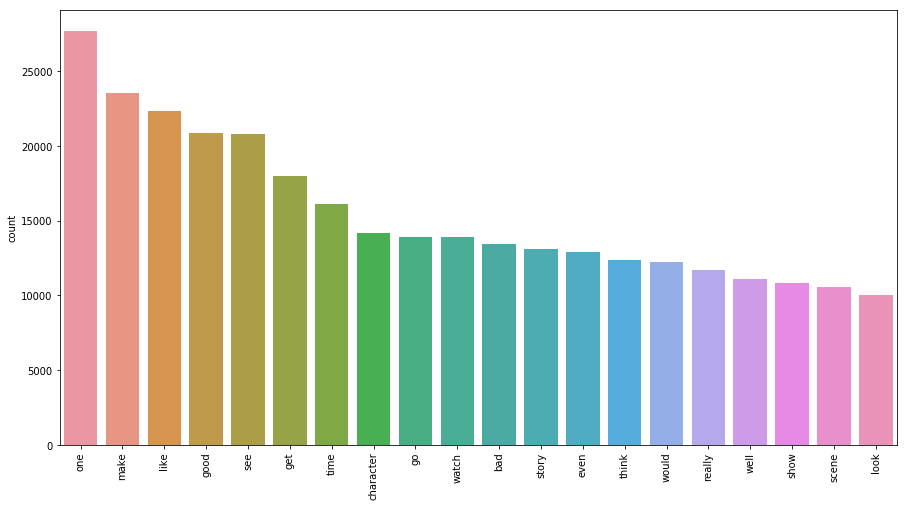

In [348]:
""" On utilise la fonction du premier exercice pour voir les mots fréquents après avoir 'nettoyer' les données
"""
count_vect, x = CountVectorizer(), transforme(X_train)
X_sub_counts = count_vect.fit_transform(x)
most_frequent_words_sub = most_frequent_words(count_vect, x)

Nous allons maintenant entrainer des modèles sur les données que nous venons de préparer.

- MultinomialNB :

In [340]:
NB_counts = MultinomialNB()
NB_counts.fit(X=X_train_mots,y=y_train)
print("L'accuracy est de %s" % accuracy_score(NB_counts.predict(X_test_mots),y_test))

L'accuracy est de 0.83608


In [352]:
def testNB_counts(*phrases):
    """On récupère l'index de chacun des mots puis on les vectorise puis on les donne au modèle 
    et récupère ses prédicions
    Ici pour ce test, on à bien que les commentaires positifs sont 1 et négatifs:0
    """
    phrases = [[word_to_id[name] for name in sentense.split()] for sentense in phrases]
    return NB_counts.predict(vect.transform(transforme(phrases)))
testNB_counts('good thing the movie is great', 'bad the film is bad', 'perfect')


array([1, 0, 1], dtype=int64)

In [ ]:
review = transforme([X_test[123]])
print(review)
review_transformed = vect.transform(review)
NB_counts.predict(review_transformed)

 - Logistic regression : 

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
logi = LogisticRegression()
logi.fit(X_train_mots, y_train)
y_preds = logi.predict(X_test_mots)
accuracy_score(y_preds, y_test)

- Utilisons le tf idf :

In [342]:
tf_idf_transf = transformer.fit_transform(X_train_mots)
tf_idf_transftest = transformer.fit_transform(X_test_mots)

 - GaussianNB :

In [343]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=y_train)
print("L'accuracy est de %s" % accuracy_score(NB_tfidf.predict(tf_idf_transftest.toarray()),y_test))

L'accuracy est de 0.71848


 - Logistic :

In [345]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(), y=y_train)
print("L'accuracy est de %s" % accuracy_score(NB_logistic.predict(tf_idf_transftest.toarray()), y_test))

L'accuracy est de 0.86036


In [349]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sub['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sub['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  backwoods
Mots avec le coeff le plus positif :  grandfather


 - Avec pipeline : 

In [347]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])
text_clf.fit(transforme(X_train), y_train)#
print("L'accuracy est de %s" %accuracy_score(text_clf.predict(transforme(X_test)), y_test))

L'accuracy est de 0.85848
